In [2]:
# Importing libraries
import pandas as pd #It allows you to store and manipulate tabular data in rows of observations and columns of variables.

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #1.Convert a collection of raw documents to a matrix of TF-IDF features. , 2. Convert a collection of text documents to a matrix of token counts

from sklearn.neighbors import NearestNeighbors #Task of finding the nearest neighbors between two sets of data.
from sklearn.cluster import KMeans #K-Means clustering
from sklearn.metrics import adjusted_rand_score #Computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [3]:
product_descriptions = pd.read_csv('/content/drive/MyDrive/ML DataSet/Updated_product_des.csv')
product_descriptions.shape

(16897, 10)

In [ ]:

product_descriptions = product_descriptions.dropna() #To drop null value fields
product_descriptions.shape
product_descriptions.head()

,Product_Id,Product_title,Product_price,User_Id,Profile_name,Helpfullness,Ratings,Time_stamp,Summary,Review
0,B000179R3I,Amazon.com: Austin Reed Dartmouth Jacket In B...,unknown,A3Q0VJTUO4EZ56,"Jeanmarie Kabala ""JP Kabala""",7,4,1182816000,This a an american blazer. Red in Color.,I own the Austin Reed dartmouth blazer in eve...
1,B000GKXY34,"Nun Chuck, Novelty: Nun Toss Toy",17.99,ADX8VLDUOL7BG,M. Gingras,0,5,1262304000,Cotton Raymond Blazer,Got these last Christmas as a gag gift. They ...
2,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,A3NM6P6BIWTIAE,Maria Carpenter,0,3,1224633600,Iphone 11 256 gb,Gave this to my dad for a gag gift after dire...
3,1882931173,Its Only Art If Its Well Hung!,unknown,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7,4,940636800,Refurbished Iphone X,This is only for Julie Strain fans. It's a co...
4,B00002066I,ah,15.99,unknown,unknown,3,5,939772800,Iphone 8 64 gb,I hope a lot of people hear this cd. We need ...


In [4]:
product_descriptions1 = product_descriptions.head(10)
# product_descriptions1.iloc[:,1]

Data1=product_descriptions1["Summary"].head(10)
Data1

0    This a an american blazer. Red in Color.
1                       Cotton Raymond Blazer
2                            Iphone 11 256 gb
3                        Refurbished Iphone X
4                              Iphone 8 64 gb
5                              Hard Drive HDD
6                              Hard Drive SSD
7                            BodyWear for men
8                        Body Perfume for men
9                          Internal Hard Disk
Name: Summary, dtype: object

In [5]:

vectorizer = TfidfVectorizer(stop_words='english') #It will not consider english words such as is,an,the and as follows.
X1 = vectorizer.fit_transform(Data1) #used for generating learning model parameters from training data and also to generate transformed data set.
X1.toarray()

array([[0.        , 0.        , 0.        , 0.5182909 , 0.44059462,
        0.        , 0.        , 0.5182909 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5182909 ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.51519219,
        0.        , 0.        , 0.        , 0.60604332, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.60604332, 0.        ,
        0.        , 0.        ],
       [0.55251242, 0.55251242, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46968604, 0.        , 0.        , 0.        ,
        0.41091978, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.       

In [8]:
X2= pd.DataFrame(X1.toarray(), index=Data1, columns=vectorizer.get_feature_names()) #To generate Two-dimensional, size-mutable, potentially heterogeneous tabular data.
X2

,11,256,64,american,blazer,body,bodywear,color,cotton,disk,drive,gb,hard,hdd,internal,iphone,men,perfume,raymond,red,refurbished,ssd
Summary,,,,,,,,,,,,,,,,,,,,,,
This a an american blazer. Red in Color.,0.000000,0.000000,0.000000,0.518291,0.440595,0.000000,0.000000,0.518291,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.518291,0.000000,0.000000
Cotton Raymond Blazer,0.000000,0.000000,0.000000,0.000000,0.515192,0.000000,0.000000,0.000000,0.606043,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.606043,0.000000,0.000000,0.000000
Iphone 11 256 gb,0.552512,0.552512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.469686,0.000000,0.000000,0.00000,0.410920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Refurbished Iphone X,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.596775,0.000000,0.000000,0.000000,0.000000,0.802409,0.000000
Iphone 8 64 gb,0.000000,0.000000,0.662879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.563507,0.000000,0.000000,0.00000,0.493002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hard Drive HDD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.563507,0.000000,0.493002,0.662879,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hard Drive SSD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.563507,0.000000,0.493002,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.662879
BodyWear for men,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761905,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.647689,0.000000,0.000000,0.000000,0.000000,0.000000
Body Perfume for men,0.000000,0.000000,0.000000,0.000000,0.000000,0.606043,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.515192,0.606043,0.000000,0.000000,0.000000,0.000000


In [9]:
X2.shape

(10, 22)

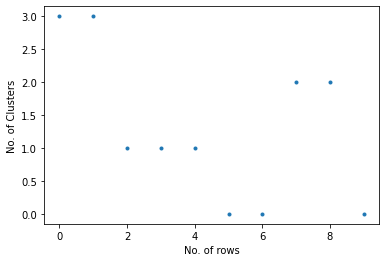

In [11]:
# Fitting K-Means to the dataset
import matplotlib.pyplot as plt

X=X1

kmeans = KMeans(n_clusters = 4, init = 'k-means++') 
#n_clusters : The number of clusters to form as well as the number of centroids to generate.
# 'init = k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

y_kmeans = kmeans.fit_predict(X) #Predict the closest cluster of each sample in X belongs to.

plt.xlabel("No. of rows")
plt.ylabel("No. of Clusters")
plt.plot(y_kmeans, ".")
plt.show()

In [18]:
y_kmeans

array([3, 3, 1, 1, 1, 0, 0, 2, 2, 0], dtype=int32)

In [19]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind]),
    print

In [20]:
true_k = 4

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# max_iter : Maximum number of iterations of the k-means algorithm for a single run.
# n_init : Maximum number of iterations of the k-means algorithm for a single run. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(X) #Fitting your model to the training data is essentially the training part of the modeling process.

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] #Sort cluster centers by proximity to centroid.
terms = vectorizer.get_feature_names() #gets a particular word.
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 hard
 drive
 hdd
 ssd
 internal
Cluster 1:
 iphone
 gb
 refurbished
 64
 11
Cluster 2:
 blazer
 raymond
 cotton
 red
 american
Cluster 3:
 men
 bodywear
 perfume
 body
 ssd


In [21]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [22]:
show_recommendations("hard drive")

Cluster 0:
 hard
 drive
 hdd
 ssd
 internal
